In [44]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Read Data

In [45]:
print(os.listdir("C://Users//Sudipta//Downloads//all//"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [46]:
app_train = pd.read_csv("C://Users//Sudipta//Downloads//all//application_train.csv")
print("Training data shape: ", app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
app_test = pd.read_csv("C://Users//Sudipta//Downloads//all//application_test.csv")
print("Test data shape: ", app_test.shape)
app_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

#### Check for imbalance class problem

In [48]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

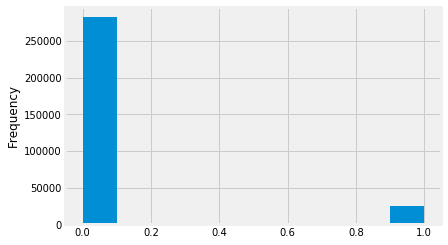

In [49]:
app_train['TARGET'].plot.hist()

##### imbalance class problem exists

#### Examine missing values - Calculate the number & %age of missing values in each column

In [50]:
  def missing_value_table(df):
        
        # Total Missing values
        miss_val = df.isnull().sum()
        
        # %age of missing values 
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Create a table
        mis_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)
        
        # Rename the columns
        mis_val_table_relnamed_col = mis_val_table.rename(columns = {0: "Missing Value", 1 : "% of total Missing Values"})
        
        # Sort the table by %age of missing values
        mis_val_table_relnamed_col = mis_val_table_relnamed_col[mis_val_table_relnamed_col.iloc[:,1] !=0].sort_values("% of total Missing Values",ascending = False).round(1)
        
        # Write Summary
        print("Selected dataframe has " + str(app_test.shape[1]) + " columns. There are " + str(mis_val_table_relnamed_col.shape[0]) + " columns that have missing values. ")
    
        return mis_val_table_relnamed_col
    




In [51]:
# Missing value stat for train & Test 
missing_value_train = missing_value_table(app_train)


Selected dataframe has 121 columns. There are 67 columns that have missing values. 


#### Column  Types

In [52]:
# Number of each type of columns

app_train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [53]:
# NUmber of uniq values in each Object columns

app_train.select_dtypes(include=['object']).apply(pd.Series.nunique,axis =0).sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
                              ..
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
Length: 16, dtype: int64

#### Label Encoding

In [54]:
# Encoding Categorical Variable


le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            print(col)
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
            
print("Number of columns lebel encoded", le_count)


NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
Number of columns lebel encoded 3


#### Onehot Encoding

In [55]:
app_train = pd.get_dummies(app_train)
app_test =  pd.get_dummies(app_test)

print("Training Feature shape", app_train.shape)
print("Test Feature shape", app_test.shape)


Training Feature shape (307511, 243)
Test Feature shape (48744, 239)


#### Aligh Training & Test data

In [56]:
train_label=app_train['TARGET']

# Keep only columns present in both the datasets
app_train, app_test = app_train.align(app_test,join = 'inner',axis = 1)

# Add target back to training
app_train['TARGET'] = train_label

print("Traing feature shape:", app_train.shape)
print("Test feature shape:", app_test.shape)

Traing feature shape: (307511, 240)
Test feature shape: (48744, 239)


#### Anomalies

In [57]:
(app_train['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [58]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

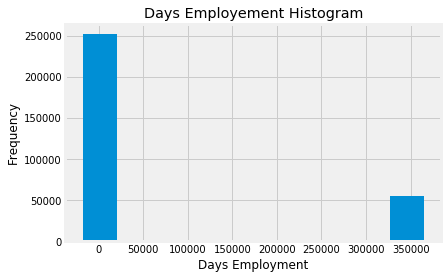

In [59]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employement Histogram')
plt.xlabel('Days Employment')

In [60]:
app_train[app_train['DAYS_EMPLOYED'] == 365243]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
8,100011,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,0.018634,...,0,0,0,0,0,0,0,0,0,0
11,100015,0,0,1,0,38419.155,148365.0,10678.5,135000.0,0.015221,...,0,0,0,0,0,0,0,0,0,0
23,100027,0,0,1,0,83250.000,239850.0,23850.0,225000.0,0.006296,...,0,1,0,0,0,0,0,1,0,0
38,100045,0,0,1,0,99000.000,247275.0,17338.5,225000.0,0.006207,...,0,0,0,0,0,1,0,1,0,0
43,100050,0,0,1,0,108000.000,746280.0,42970.5,675000.0,0.010966,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,0,1,0,202500.000,703728.0,29943.0,607500.0,0.031329,...,0,0,0,0,0,1,0,1,0,0
307483,456227,0,0,1,0,99000.000,247275.0,16479.0,225000.0,0.007330,...,0,0,0,0,0,1,0,1,0,0
307487,456231,0,0,1,0,117000.000,1071909.0,31473.0,936000.0,0.010147,...,0,0,0,0,0,0,0,0,0,0
307505,456249,0,0,1,0,112500.000,225000.0,22050.0,225000.0,0.022800,...,0,0,0,0,1,0,0,1,0,0


In [61]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243 ]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243 ]

print('anom loan default rate: ', anom['TARGET'].mean() * 100)
print('Non-anom loan default rate: ', non_anom['TARGET'].mean() * 100)
print('Total Number of anomalies: ', len(anom))

anom loan default rate:  5.399646043269405
Non-anom loan default rate:  8.65997453765215
Total Number of anomalies:  55374


Text(0.5,0,'Number of employment days')

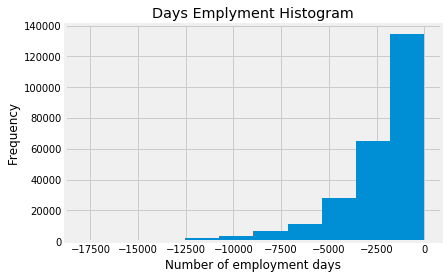

In [62]:
# Create anomalie flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace anomalies with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Emplyment Histogram')
plt.xlabel('Number of employment days')


In [63]:
# Apply the same logic for test

Text(0.5,0,'Number of employment days')

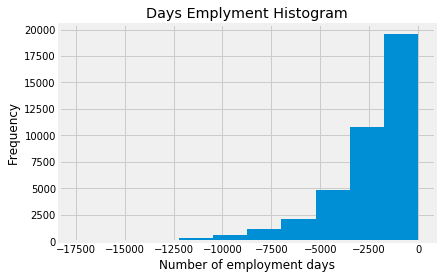

In [64]:
# Create anomalie flag column
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

# Replace anomalies with nan
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)

app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Emplyment Histogram')
plt.xlabel('Number of employment days')


#### Correlation

In [65]:
# Find the correltion with the target & sort

correlation=app_train.corr()['TARGET'].sort_values()

In [66]:
print("Most positive correltion: \n", correlation.tail(15))
print("Most negative correltion: \n", correlation.head(15))

Most positive correltion: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
                                                       ...   
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, Length: 15, dtype: float64
Most negative correltion: 
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F            

In [67]:
# Effect of age on repayment

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])


-0.078239308309880989

Text(0,0.5,'count')

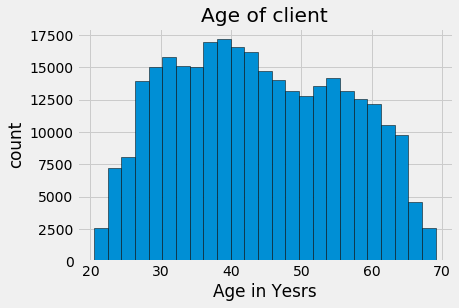

In [68]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH']/365,edgecolor = 'k', bins = 25)
plt.title('Age of client')
plt.xlabel('Age in Yesrs')
plt.ylabel('count')

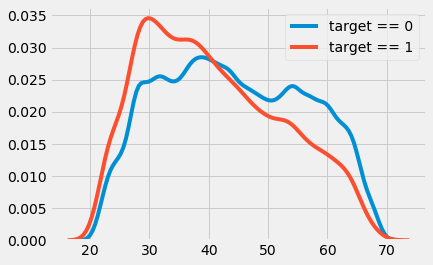

In [69]:
sns.kdeplot(app_train.loc[app_train['TARGET']== 0, 'DAYS_BIRTH'] /365 , label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET']!= 0, 'DAYS_BIRTH'] /365 , label = 'target == 1')


In [70]:
app_train.loc[app_train['TARGET']== 0, 'DAYS_BIRTH']

1         16765
2         19046
3         19005
4         19932
5         16941
          ...  
307505    24384
307506     9327
307507    20775
307508    14966
307510    16856
Name: DAYS_BIRTH, Length: 282686, dtype: int64

In [71]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [72]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


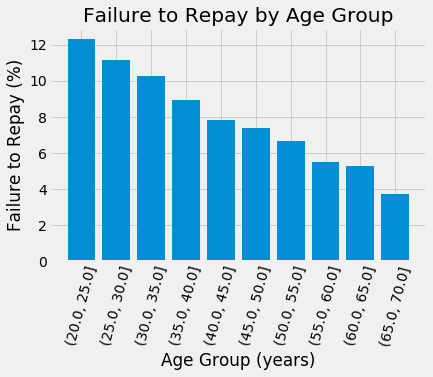

In [73]:
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); 
plt.xlabel('Age Group (years)'); 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### Exterior sources

In [74]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


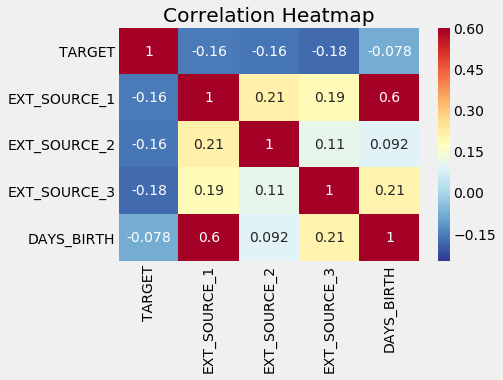

In [75]:
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

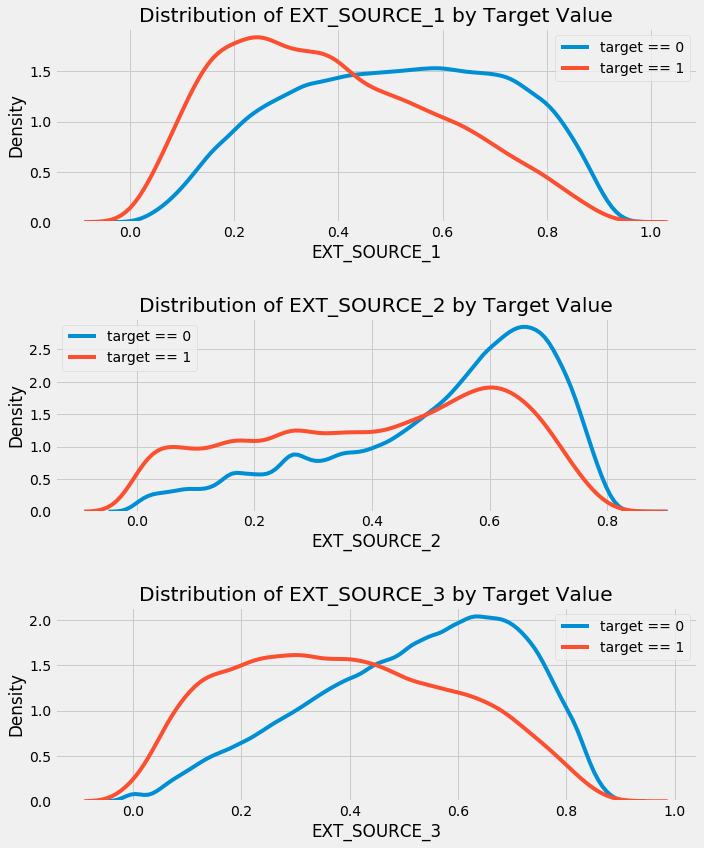

In [76]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### Pair plot

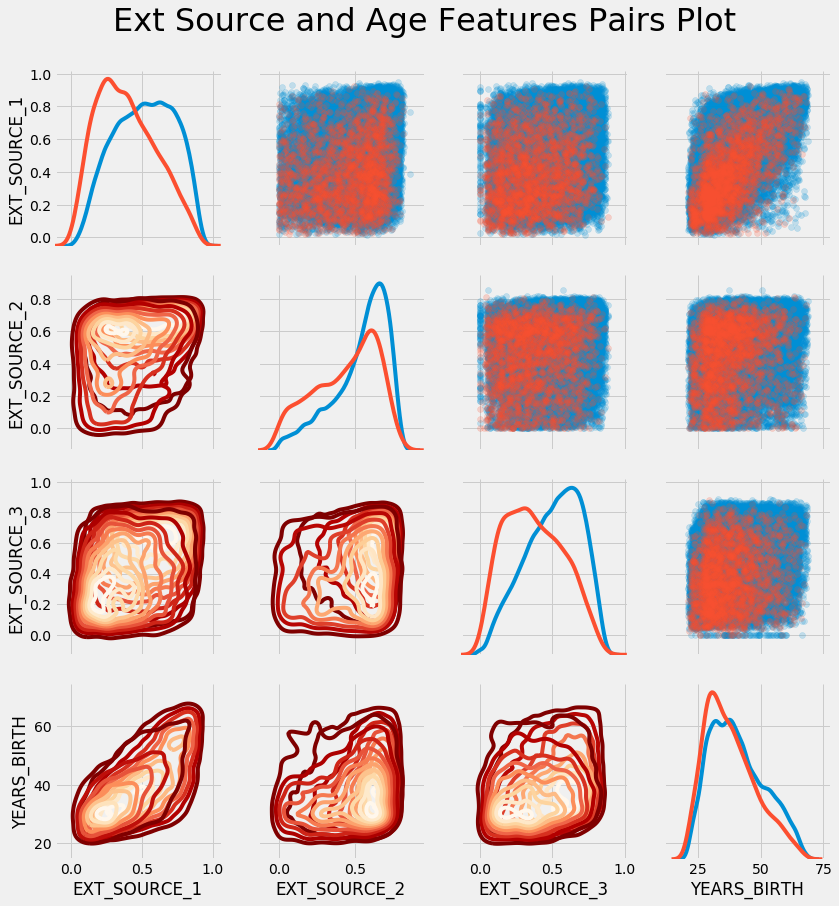

In [77]:
# Copy the data for plotting
plot_data = ext_data.drop(labels=['DAYS_BIRTH'],axis=1).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Feature Engineering

#### Polynomial Features

In [78]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [79]:
# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

In [80]:
poly_target = poly_features['TARGET']

In [81]:
poly_features = poly_features.drop(labels = ['TARGET'],axis = 1)

In [82]:
# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)


In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3).fit(poly_features)
print(poly_transformer.get_feature_names(poly_features.columns))

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

In [42]:
# Train the polynomial features
poly_transformer.fit(poly_features)


# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [43]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'